In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import cv2

from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Convolution2D, Flatten, MaxPooling2D, Dropout
from keras.utils import np_utils

from skimage.feature import hog
from skimage import data, exposure
import pickle

Using TensorFlow backend.


In [2]:
!wget https://www.floydhub.com/api/v1/resources/tJ4C72SQps88GWr3hr88uU/X.pickle?content=true&rename=xpickle
!mv X.pickle\?content\=true X.pickle

--2018-10-29 15:21:15--  https://www.floydhub.com/api/v1/resources/tJ4C72SQps88GWr3hr88uU/X.pickle?content=true
Resolving www.floydhub.com (www.floydhub.com)... 104.25.128.32, 104.25.129.32, 2606:4700:20::6819:8120, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.25.128.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘X.pickle?content=true’

X.pickle?content=tr     [  <=>               ] 359.07M  13.2MB/s    in 28s     

2018-10-29 15:21:43 (12.8 MB/s) - ‘X.pickle?content=true’ saved [376515380]



In [3]:
!wget https://www.floydhub.com/api/v1/resources/tJ4C72SQps88GWr3hr88uU/y.pickle?content=true&rename=ypickle
!mv y.pickle\?content\=true y.pickle

--2018-10-29 14:14:21--  https://www.floydhub.com/api/v1/resources/tJ4C72SQps88GWr3hr88uU/y.pickle?content=true
Resolving www.floydhub.com (www.floydhub.com)... 104.25.128.32, 104.25.129.32, 2606:4700:20::6819:8120, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.25.128.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘y.pickle?content=true’

y.pickle?content=tr     [    <=>             ]   7.78M  9.62MB/s    in 0.8s    

2018-10-29 14:14:22 (9.62 MB/s) - ‘y.pickle?content=true’ saved [8154588]



In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
y[y == '+'] = 10
y[y=='-'] = 11
y[y=='times'] = 12
y[y=='forward_slash'] = 13


In [0]:
y = np_utils.to_categorical(y)

In [7]:
print(X.shape,y.shape)

(156816, 2401) (156816, 14)


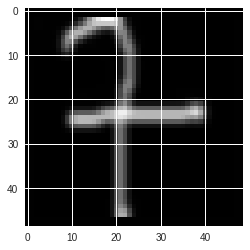

In [8]:
plt.imshow(X[32201].reshape(49,49),cmap='gray')

In [4]:
!wget https://www.floydhub.com/api/v1/resources/RgNtgaQump7XvqUQ4J8ecH/phog.py?content=true&rename=phogpy
!mv phog.py?content=true phog.py

--2018-10-29 15:22:36--  https://www.floydhub.com/api/v1/resources/RgNtgaQump7XvqUQ4J8ecH/phog.py?content=true
Resolving www.floydhub.com (www.floydhub.com)... 104.25.128.32, 104.25.129.32, 2606:4700:20::6819:8120, ...
Connecting to www.floydhub.com (www.floydhub.com)|104.25.128.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘phog.py?content=true’

phog.py?content=tru     [ <=>                ]   7.36K  --.-KB/s    in 0s      

2018-10-29 15:22:37 (50.1 MB/s) - ‘phog.py?content=true’ saved [7533]



In [0]:
import phog as phog

In [11]:
features = phog.PHogFeatures().get_features(X[32201].reshape(49,49))
features.shape

/usr/local/lib/python3.6/dist-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


(680,)

In [0]:
phog = phog.PHogFeatures()

In [0]:
X = np.apply_along_axis(extract_phog,axis=1,arr = X)

/usr/local/lib/python3.6/dist-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


In [0]:
def extract_phog(array) : 
    img = array.reshape(49,49)
    features = phog.get_features(img)
    return features

In [0]:
 from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [18]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(105066, 680) (51750, 680)
(105066, 14) (51750, 14)


In [28]:
model = Sequential()


model.add(Dense(512,input_shape=(680,)))
model.add(Activation('relu'))


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(14))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               348672    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import TensorBoard
import time
import tensorflow as tf

In [0]:
NAME = 'CROHME-digits-phog-20e-split-{}'.format(int(time.time()))

In [0]:
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [25]:
keras.backend.get_session().run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [33]:
hist = model.fit(X_train, y_train,
         epochs=20,
         shuffle=True,
         batch_size=512,
         validation_data=(X_test,y_test),callbacks = [tensorboard])

Train on 105066 samples, validate on 51750 samples
Epoch 1/20
105066/105066 [==============================] - 3s 28us/step - loss: 0.9910 - acc: 0.7085 - val_loss: 0.3814 - val_acc: 0.8787
Epoch 2/20
105066/105066 [==============================] - 2s 22us/step - loss: 0.2738 - acc: 0.9196 - val_loss: 0.1435 - val_acc: 0.9612
Epoch 3/20
105066/105066 [==============================] - 2s 22us/step - loss: 0.1418 - acc: 0.9619 - val_loss: 0.0873 - val_acc: 0.9777
Epoch 4/20
105066/105066 [==============================] - 2s 22us/step - loss: 0.0952 - acc: 0.9753 - val_loss: 0.0615 - val_acc: 0.9843
Epoch 5/20
105066/105066 [==============================] - 2s 22us/step - loss: 0.0671 - acc: 0.9826 - val_loss: 0.0506 - val_acc: 0.9867
Epoch 6/20
105066/105066 [==============================] - 2s 22us/step - loss: 0.0536 - acc: 0.9861 - val_loss: 0.0398 - val_acc: 0.9896
Epoch 7/20
105066/105066 [==============================] - 2s 22us/step - loss: 0.0424 - acc: 0.9892 - val_loss: 0

In [0]:
import h5py

model.save('phog-crohme-digits-20e-features.h5')  # creates a HDF5 file 'my_model.h5'
f = h5py.File('phog-crohme-digits-20e-features.h5', 'r+')
del f['optimizer_weights']
f.close()